In [26]:
import pandas as pd

In [27]:
df_rec = pd.read_pickle('recommender_dataframe')

In [28]:
df_rec.head()

,Name,Platform,Genre,Publisher,Critic_Score,Year,Joined Column
3,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,Shooter,PUBG Corporation,7,2017,"PLAYERUNKNOWN'S BATTLEGROUNDS, Shooter, PUBG C..."
9,MINECRAFT,PC,Misc,Mojang,10,2010,"MINECRAFT, Misc, Mojang"
20,GRAND THEFT AUTO V,PS4,Action,Rockstar Games,9,2014,"GRAND THEFT AUTO V, Action, Rockstar Games"
22,GARRY'S MOD,PC,Misc,Unknown,6,2004,"GARRY'S MOD, Misc, Unknown"
34,CALL OF DUTY: BLACK OPS 3,PS4,Shooter,Activision,7,2015,"CALL OF DUTY: BLACK OPS 3, Shooter, Activision"


In [29]:
# Compute jaccard similarity
def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [30]:
def get_recommendation(name, platform):
    df_rec1 = df_rec[['Name', 'Platform', 'Joined Column']]
    df_rec_final = df_rec1[df_rec1['Platform'] == platform]
    df_rec_final = df_rec_final[['Name', 'Joined Column']]
    game_desc = df_rec_final.groupby('Name')['Joined Column'].apply(list).to_dict() # Convert dataframe to dictionary
    rec_dict = {}
    for k in game_desc.keys():
        rec_dict[k] = get_jaccard_sim(game_desc[name][0], game_desc[k][0])
    sort_dict = sorted(rec_dict.items(), key=lambda x: x[1], reverse=True)
    return {tp[0]: round(tp[1],2) for tp in sort_dict[1:11]}

In [31]:
get_recommendation('GRAND THEFT AUTO V', 'PC')

{'GRAND THEFT AUTO III': 0.75,
 'GRAND THEFT AUTO IV': 0.75,
 'GRAND THEFT AUTO 2': 0.56,
 'GRAND THEFT AUTO IV: THE COMPLETE EDITION': 0.55,
 'GRAND THEFT AUTO: LONDON 1969': 0.5,
 'GRAND THEFT AUTO: SAN ANDREAS': 0.5,
 'GRAND THEFT AUTO: VICE CITY': 0.5,
 'GRAND THEFT AUTO': 0.44,
 'GRAND THEFT AUTO: EPISODES FROM LIBERTY CITY': 0.42,
 'GRAND THEFT AUTO IV: THE LOST AND DAMNED': 0.38}

In [32]:
games = get_recommendation('GRAND THEFT AUTO V', 'PC')

In [33]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import io
from flask import Flask,render_template,request,redirect, Response

In [34]:
game_list = list(games.keys())

In [35]:
percent = [int(x*100) for x in list(games.values())]

In [36]:
percent

[75, 75, 56, 55, 50, 50, 50, 44, 42, 38]

In [61]:
def plot():
    game_list = list(games.keys())
    percent = [int(x*100) for x in list(games.values())]

    # number of data points
    n = len(percent)
    # percent of circle to draw for the largest circle
    percent_circle = max(percent) / 100

    r = 3  # outer radius of the chart
    r_inner = 1  # inner radius of the chart
    # calculate width of each ring
    w = (r - r_inner) / n

    # create colors along a chosen colormap
    colors = [plt.cm.magma(i / n) for i in range(n)]
    # colors.reverse()
    # colors = plt.cm.tab10.colors

    # create figure, axis
    fig, ax = plt.subplots()

    for i in range(n):
        radius = r - i * w
        ax.pie([percent[i] / max(percent) * percent_circle], radius=radius, startangle=90,
            counterclock=False,
            colors=[colors[i]],
            labels=[f'{game_list[i]} – {percent[i]}%'], labeldistance=None,
            wedgeprops={'width': w, 'edgecolor': 'white'})
        ax.text(0, radius - w / 2, f'{game_list[i]} – {percent[i]}% ', ha='right', va='center')

    # plt.legend(loc='upper right', bbox_to_anchor=(0.5, 1.1), prop={'size': 12})
    plt.tight_layout()
    plt.plot()

<ipython-input-61-6564cdfe9892>:25: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie([percent[i] / max(percent) * percent_circle], radius=radius, startangle=90,
<ipython-input-61-6564cdfe9892>:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


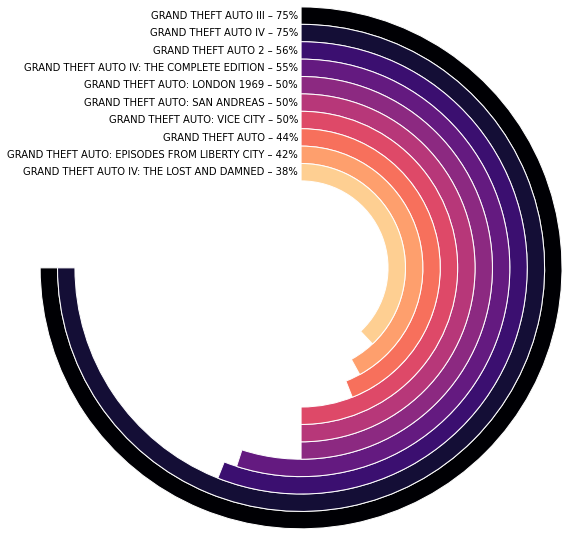

In [62]:
plot()

<ipython-input-121-39d84f20188a>:22: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie([percent[i] / max(percent) * percent_circle], radius=radius, startangle=90,
<ipython-input-121-39d84f20188a>:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


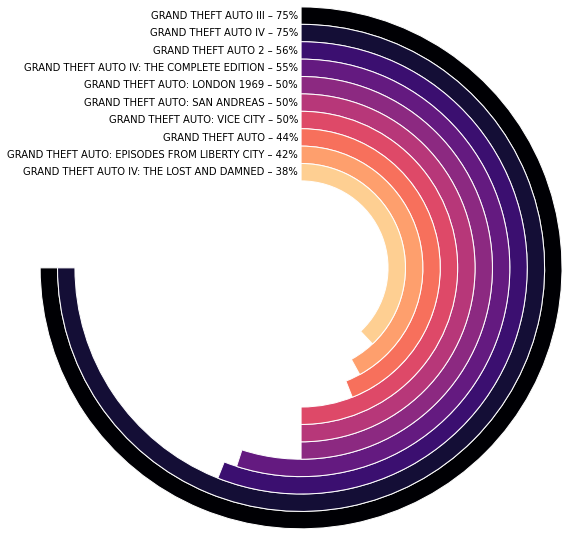

In [121]:
game_list = list(games.keys())
percent = [int(x*100) for x in list(games.values())]

# number of data points
n = len(percent)
# percent of circle to draw for the largest circle
percent_circle = max(percent) / 100

r = 3  # outer radius of the chart
r_inner = 1  # inner radius of the chart
# calculate width of each ring
w = (r - r_inner) / n

# create colors along a chosen colormap
colors = [plt.cm.magma(i / n) for i in range(n)]
# colors.reverse()
# colors = plt.cm.tab10.colors

# create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

for i in range(n):
    radius = r - i * w
    ax.pie([percent[i] / max(percent) * percent_circle], radius=radius, startangle=90,
           counterclock=False,
           colors=[colors[i]],
           labels=[f'{game_list[i]} – {percent[i]}%'], labeldistance=None,
           wedgeprops={'width': w, 'edgecolor': 'white'})
    ax.text(0, radius - w / 2, f'{game_list[i]} – {percent[i]}% ', ha='right', va='center')

# plt.legend(loc='upper right', bbox_to_anchor=(0.5, 1.1), prop={'size': 12})
plt.tight_layout()
plt.show()

In [89]:
colors

[(1.0, 0.9607843137254902, 0.9411764705882353, 1.0),
 (0.9969242599000384, 0.8961937716262975, 0.8489042675893886, 1.0),
 (0.9913725490196079, 0.7913725490196079, 0.7082352941176471, 1.0),
 (0.9882352941176471, 0.6715417147251057, 0.5605382545174933, 1.0),
 (0.9874509803921568, 0.5411764705882353, 0.41568627450980394, 1.0),
 (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0),
 (0.9466666666666667, 0.26823529411764707, 0.19607843137254902, 1.0),
 (0.8503344867358708, 0.14686658977316416, 0.13633217993079583, 1.0),
 (0.7364705882352941, 0.08, 0.10117647058823528, 1.0),
 (0.5946174548250673, 0.04613610149942329, 0.07558631295655516, 1.0)]

In [90]:
colors.reverse()

In [91]:
colors

[(0.5946174548250673, 0.04613610149942329, 0.07558631295655516, 1.0),
 (0.7364705882352941, 0.08, 0.10117647058823528, 1.0),
 (0.8503344867358708, 0.14686658977316416, 0.13633217993079583, 1.0),
 (0.9466666666666667, 0.26823529411764707, 0.19607843137254902, 1.0),
 (0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0),
 (0.9874509803921568, 0.5411764705882353, 0.41568627450980394, 1.0),
 (0.9882352941176471, 0.6715417147251057, 0.5605382545174933, 1.0),
 (0.9913725490196079, 0.7913725490196079, 0.7082352941176471, 1.0),
 (0.9969242599000384, 0.8961937716262975, 0.8489042675893886, 1.0),
 (1.0, 0.9607843137254902, 0.9411764705882353, 1.0)]

In [85]:
nums = [1,2,3]

In [86]:
nums.reverse()

In [87]:
nums

[3, 2, 1]